This notebook is with the [dataset](https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-01-18/readme.md) of week 3 of 2022 from the Tidy Tuesday community.

I am trying to do some simple stuff in python, (maybe) equvalent to what I can do quickly with R. Suggestions are welcomed.
I am writing comments in R as well, to be able to see / compare / learn between the two. A nice resource for comparing functions can be found [here](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_r.html).

In [1]:
# the python toolkit for data analysis and visualistion. 
# more or less to doing library(tidyverse) (without going into details).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# the dataset
# R: chocolate <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-18/chocolate.csv')
chocolate = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-18/chocolate.csv')

In [3]:
# R: dplyr::glimpse(chocolate)
chocolate.dtypes

ref                                   int64
company_manufacturer                 object
company_location                     object
review_date                           int64
country_of_bean_origin               object
specific_bean_origin_or_bar_name     object
cocoa_percent                        object
ingredients                          object
most_memorable_characteristics       object
rating                              float64
dtype: object

In [4]:
chocolate.shape

(2530, 10)

I want to start with something simple. I want to see if there is some kind of association between `cocoa_percent` and `rating`. A scatter plot would suit nicely. But `cocoa_percent` is `dtype object` (it's how pandas stores strings ([more here](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)). We can veryfy that by looking at the data below.

In [5]:
# glimpse (more or less) provides this information but it is also possible to view head in R
# R: head(chocolate, 10)
chocolate.head(10)

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
5,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80%,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.25
6,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50
7,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50
8,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
9,1011,A. Morin,France,2013,Panama,Panama,70%,"4- B,S,C,L","brief fruit note, earthy, nutty",2.75


So the next step is to transform this variable for it be suitable for plotting in a scatter plot: from text to number.

In [6]:
# R: chocolate <- chocolate %>% 
#          dplyr::mutate(cocoa_pctg = readr::parse_number(cocoa_percent))
# Should we divide or not by 100? It doesn't seem to important at this moment.
chocolate["cocoa_pctg"] = chocolate.cocoa_percent.str.rstrip('%').astype('float')# / 100.0

In [7]:
# Verify that we now have numbers.
chocolate.cocoa_pctg.head(5)

0    76.0
1    76.0
2    76.0
3    68.0
4    72.0
Name: cocoa_pctg, dtype: float64

In [8]:
# Are there any chocolates that are 100% cocoa? 
# R: max(chocolate$cocoa_pctg)
chocolate.cocoa_pctg.max()

100.0

In [9]:
# R  chocolate %>% 
#  filter(cocoa_pctg == "100")
# I am using reset_index() here to see the row count. I am not sure this is the right way.
chocolate[chocolate["cocoa_percent"] == "100%"].reset_index()

,index,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,cocoa_pctg
0,164,486,Artisan du Chocolat,U.K.,2010,Venezuela,Venezuela,100%,NaN,"very nutty, very bitter",1.75,100.0
1,293,81,Bonnat,France,2006,Blend,One Hundred,100%,NaN,"acidic, bitter, dry",1.50,100.0
2,323,341,Bouga Cacao (Tulicorp),Ecuador,2009,Ecuador,"El Oro, Hacienda de Oro",100%,NaN,"cardboard, very bitter, floral",1.50,100.0
3,435,1185,C-Amaro,Italy,2013,Ecuador,Ecuador,100%,1- B,"fatty, controlled bitter, fruit",3.50,100.0
4,590,252,Claudio Corallo,Sao Tome,2008,Blend,"Principe, Sao Tome & Principe",100%,NaN,"chalky, musty, very bitter",1.00,100.0
5,626,817,Coppeneur,Germany,2012,Ecuador,Ecuador Puristique,100%,NaN,high intensity bitter,1.50,100.0
6,784,1109,Domori,Italy,2013,Venezuela,"IL100, H. San Jose, batch NDL3A01",100%,NaN,"smooth, fruit, coffee, bitter",3.00,100.0
7,1106,1205,Habitual,Canada,2014,Blend,one hundred,100%,NaN,"unrefined, bitter, earthy",2.00,100.0
8,1180,1113,Hotel Chocolat,U.K.,2013,St. Lucia,"Island Growers, 2012, 120hr c., batch 13080",100%,NaN,"pastey, bitter, unfixable",1.75,100.0
9,1197,1113,Hotel Chocolat (Coppeneur),U.K.,2013,Ecuador,"Los Rios, H. Iara, 2012, 120hr c., batch 13092",100%,1- B,"candy,uncontrolled bitterness",2.50,100.0


Now we have the data in the desired format. Time for a plot. I am follwing mostly the explanation at [Effectively Using Matplotlib ](https://pbpython.com/effective-matplotlib.html). 

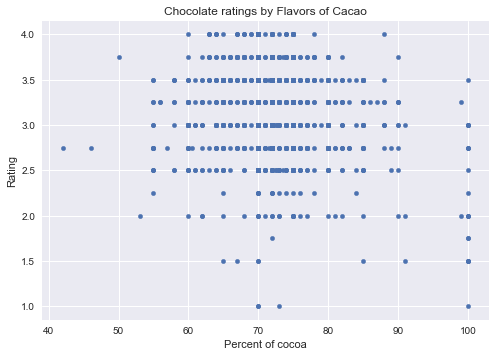

In [10]:
# R: ggplot(chocolate) +
#      aes(x = cocoa_pctg, y = rating ) +
#      geom_point() +
#      theme_light() +
#      labs(title = "Chocolate ratings by Flavors of Cacao",
#           x = "Percent of cocoa",
#           y = "Rating")


plt.style.use('seaborn') # can be 'ggplot' also, but let's see what else is there.
fig, ax = plt.subplots()
chocolate.plot(kind = "scatter", x = "cocoa_pctg", y = "rating", ax = ax)
ax.set(title = "Chocolate ratings by Flavors of Cacao", 
       xlabel = "Percent of cocoa",
       ylabel = "Rating"
      ); #semicolon omits outpup of last object in cell which is the text, and we want it only in the plot

Seems like chocolate is good, regardless of how much cocoa is in it. :)